# Klimaendringer
```{epigraph}
Scientific evidence for warming of the climate system is unequivocal.

-- Intergovernmental Panel on Climate Change

```
Her skal vi se på data hentet fra [NASA](https://climate.nasa.gov/vital-signs/global-temperature/) og analysere dataen for å se evidens for klimaendringene. Vi skal se på forskjellig målte data og gjøre analyse av disse. Vi skal blant annet evaluere påstander om hvor raskt noen konsekvenser av klimaendringene skjer ved å regne det ut fra dataene selv.


## Eksempel: $\text{CO}_2$-nivåer i atmosfæren

Før du skal gjøre en del analyse selv, skal vi se på et eksempel der vi skal se på $\text{CO}_2$-nivåene i atmosfæren. Målingene er gjort på Mauna Loa-observatoriet på Hawaii, helt siden 1958 til 2023. Dataene er hentet fra [NOAA](https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html).

<!-- Vi skal se på data fra 1958 til 2016. Vi skal se på hvordan $\text{CO}_2$-nivåene har endret seg over tid, og vi skal se på hvordan $\text{CO}_2$-nivåene varierer gjennom året. -->



### Last ned datasett for $\text{CO}_2$-nivåer

Du kan laste ned datasettet for $\text{CO}_2$-nivåer med følgende kode:

In [1]:
import requests

url = "https://raw.githubusercontent.com/reneaas/vgs_programmering/main/datasets/climate_data/co2_measurements.txt"
r = requests.get(url, allow_redirects=True)

with open("co2_measurements.txt", "wb") as outfile:
    outfile.write(r.content)

De første radene i datasettet ser slik ut:

In [14]:
import os

tmp = os.system("cat co2_measurements.txt | head -n 10")

#            decimal       monthly    de-season  #days  st.dev  unc. of
#             date         average     alized          of days  mon mean
 1958    3   1958.2027      315.70      314.43     -1   -9.99   -0.99
 1958    4   1958.2877      317.45      315.16     -1   -9.99   -0.99
 1958    5   1958.3699      317.51      314.71     -1   -9.99   -0.99
 1958    6   1958.4548      317.24      315.14     -1   -9.99   -0.99
 1958    7   1958.5370      315.86      315.18     -1   -9.99   -0.99
 1958    8   1958.6219      314.93      316.18     -1   -9.99   -0.99
 1958    9   1958.7068      313.20      316.08     -1   -9.99   -0.99
 1958   10   1958.7890      312.43      315.41     -1   -9.99   -0.99


Vi kan merke oss at: 

1. De to første linjene er bare kommentarer, og kan ignoreres.
2. De resterende linjene har kolonner med følgende informasjon:
    - Kolonne 1: År (1958-2023)
    - Kolonne 2: Måned (1-12)
    - Kolonne 3: År målt i desimaltall (f.eks er 1958.0417 = januar 1958)
    - Kolonne 4: $\text{CO}_2$-mengde i atmosfæren (i ppm)
    - Kolonne 5: *De-seasonalized* $\text{CO}_2$-mengde i atmosfæren (i ppm). Dette handler mest om å trekke fra påvirkninger fra årstidene, og kan ignoreres.
    
De resterende kolonnene er uviktige, så vi kan ignorere deres betydning.


### Lese inn data fra filen

La oss starte med å lese inn dataen fra filen. Deretter ønsker vi å hente ut årene målt som desimaltall (kolonne 3) og $\text{CO}_2$-nivåene (kolonne 4). Følgende Pythonkode løser dette for oss:

In [70]:
import numpy as np

filnavn = "co2_measurements.txt"

# Husk at de første to linjene i filen er kommentarer
data = np.loadtxt(filnavn, skiprows=2) 

år = data[:, 2] # indeks 2 = kolonne 3
co2 = data[:, 3] # indeks 3 = kolonne 4

### Visualisere $\text{CO}_2$-nivåene over tid

Vi er nå klare for å visualisere $\text{CO}_2$-nivåene over tid. Vi ønsker å plotte $\text{CO}_2$-nivåene som en funksjon av årene målt som desimaltall. Vi kan gjøre dette med følgende kode:

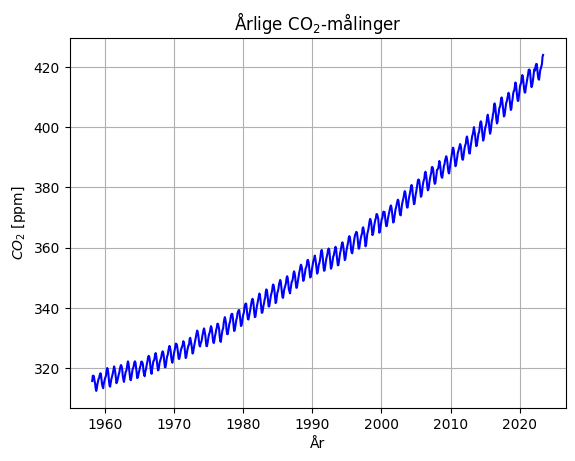

In [12]:
import matplotlib.pyplot as plt # Importerer plottebiblioteket

plt.plot(år, co2, "b-") # Plotter co2 mot år
plt.xlabel("År") # Setter navn på x-akse
plt.ylabel("$CO_2$ [ppm]") # Setter navn på y-akse
plt.title("Årlige CO$_2$-målinger") # Setter tittel på plottet
plt.grid(True)
plt.show() # Viser plottet

Så vi kan se en stødig økning av $\text{CO}_2$-nivået i atmosfæren i denne perioden.

## Oppgaver

### Oppgave 1: $\text{CH}_4$-mengder (Metangass) i atmosfæren

$\text{CH}_4$ (metangass) er en sterkere klimagass enn $\text{CO}_2$ fordi den absorbere mer energi enn $\text{CO}_2$ i de samme bølgelengdene. Men $\text{CH}_4$ er også en kortlevd klimagass, som betyr at den brytes ned raskere enn $\text{CO}_2$. Typisk vil $\text{CH}_4$ brytes ned i løpet av 7 år til 12 år. Vi skal anta at metangass brytes ned på 10 år i denne oppgaven. Målet er å finne ut hvor mye $\text{CH}_4$-gass som slippes ut i atmosfæren hvert år i gjennomsnitt basert på ekte data hentet fra [NASA](https://climate.nasa.gov/vital-signs/methane/).

#### Last ned datasettet

Du kan laste ned datasettet med følgende Pythonkode:

In [1]:
import requests

url = "https://raw.githubusercontent.com/reneaas/vgs_programmering/main/datasets/climate_data/methane_measurements.txt"

r = requests.get(url=url, allow_redirects=True)
with open("methane_measurements.txt", "wb") as outfile:
    outfile.write(r.content)

I datafilen er det mye tekst før dataen kommer. Heldigvis er alle linjer med tekst markert med `#`, som betyr at `np.loadtxt` vil ignorere dem og automatisk hoppe over dem, så vi slipper å spesifisere `skiprows` manuelt!

Her er linje 52-67 i datafilen:

In [2]:
import os

tmp = os.system("cat methane_measurements.txt | head -n 67 | tail -n 15")

# et al., 1994, JGR, vol. 99, 17021-17043, for a complete discussion.
#
# CH4 expressed as a mole fraction in dry air, nanomol/mol, abbreviated as ppb
#
# NOTE: In general, the data presented for the last year are subject to change,
# depending on recalibration of the reference gas mixtures used, and other quality
# control procedures. Occasionally, earlier years may also change for the same
# reasons.  Usually these changes are minor.
# 

# year     mean      unc
  1984  1644.68     0.68
  1985  1657.28     0.67
  1986  1670.08     0.82
  1987  1682.71     0.48


Her har kolonnene følgende betydning:

- Kolonne 1: årstallet
- Kolonne 2: Gjennomsnittlig mengde $\text{CH}_4$ i atmosfæren i ppb (parts per billion. *Norsk: Antall molekyler per millard molekyler*).
- Kolonne 3: Usikkerhet i mengde $\text{CH}_4$ i atmosfæren, også målt i ppb. 

#### Oppgave 1a: Les inn og visualiser dataene

Første steg er at du skal laste inn dataen og visualiser den. Du kan bruke kodeskallet under for å lese inn dataen. Du må fylle inn der det står `NotImplemented`.



````{dropdown} Kode for visualisering av dataen

```python

plt.plot(år, metan, color="red")
plt.plot(år, metan, "k.") # Plotter datapunktene som svarte prikker
plt.xlabel("År")
plt.ylabel("$CH_4$ [parts per billion]")
plt.title("Årlige metanmålinger")
plt.grid(True)
plt.show()
```

````

In [ ]:
import matplotlib.pyplot as plt

filnavn = "methane_measurements.txt"

data = NotImplemented

år = NotImplemented
metan = NotImplemented
usikkerhet = NotImplemented

````{dropdown} Løsningsforslag

```python
filnavn = "methane_measurements.txt"

data = np.loadtxt(filnavn)

år = data[:, 0]
metan = data[:, 1]
usikkerhet = data[:, 2]

plt.plot(år, metan, color="red")
plt.plot(år, metan, "k.")
plt.xlabel("År")
plt.ylabel("$CH_4$ [parts per billion]")
plt.title("Årlige metanmålinger")
plt.grid(True)
plt.show()
```

som gir

```{figure} ./figurer/methane_measurements.pdf
---
name: methane_measurements
---

Årlige metanmålinger målt i antall metanmolekyler per millard molekyler i atmosfæren fra 1983 til 2022. 
```

````

### Oppgave 2: Globale temperaturavvik siden 1880

I denne oppgaven skal du se på temperaturavvikene på jorda siden 1880. Dataen er hentet fra [NASA](https://climate.nasa.gov/vital-signs/global-temperature/).

#### Last ned datasettet

Last ned datafilen med denne koden:

In [15]:
import requests

url = "https://raw.githubusercontent.com/reneaas/vgs_programmering/main/datasets/climate_data/global_temperatures.txt"
r = requests.get(url=url, allow_redirects=True)

with open("global_temperatures.txt", "wb") as outfile:
    outfile.write(r.content)

De første linjene i datafilen ser slik ut:

In [89]:
import os

tmp = os.system("cat global_temperatures.txt | head -n 12")

Land-Ocean Temperature Index (C)
--------------------------------

Year No_Smoothing  Lowess(5)
----------------------------
1880     -0.17     -0.10
1881     -0.09     -0.13
1882     -0.11     -0.17
1883     -0.18     -0.21
1884     -0.29     -0.24
1885     -0.34     -0.27
1886     -0.32     -0.28


Kolonnene i datafilen har følgende betydning:
- Kolonne 1: År
- Kolonne 2: Temperaturavvik fra gjennomsnittet i perioden 1851-1880 (i grader Celsius)
- Kolonne 3: Temperaturavvik fra gjennomsnittet i perioden 1851-1880 med *smoothing* (i grader Celsius). Du kan tenke på det som en glattet kurve som passer best med dataen i kolonne 2.

#### Oppgave 2a: Les inn data fra filen og visualiser dataen

Skriv en Pythonkode som leser inn dataen fra filen. Hent ut følgende fra `data`:

1. Årene og lagre dem i en variabel `år`.
2. Temperaturavvikene (kolonne 2) og lagre dem i en variabel `temperatur_avvik`.
3. Temperaturavvikene med *smoothing* (kolonne 3) og lagre dem i en variabel `temperatur_avvik_smooth`.


*Du kan ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`. Husk at du må ha lastet ned datafilen først.*

In [ ]:
import numpy as np

filnavn = "global_temperatures.txt"
data = NotImplemented # Les inn dataen

år = NotImplemented # Fyll inn
temperatur_avvik = NotImplemented # Fyll inn
temperatur_avvik_smooth = NotImplemented # Fyll inn

For å visualisere dataen kan du bruke følgende kode koden under, eller du kan skrive din egen kode.

````{dropdown} Kode for visualisering

```python
import matplotlib.pyplot as plt

# Plott av temperaturavvik mot år
plt.plot(år, temperatur_avvik, color="purple", label="Årlig avvik", alpha=0.5)

# Plott av glattet temperaturavvik mot år
plt.plot(år, temperatur_avvik_smooth, color="red", label="Glatting")

# Pynting av plottet
plt.xlabel("År") # Setter navn på x-akse
plt.ylabel("Temperaturavvik [°C]") # Setter navn på y-akse
plt.title("Årlige temperaturavvik siden 1880") # Setter tittel på plottet
plt.grid(True)
plt.legend()
plt.show() # Viser plottet
```
````

````{dropdown} Løsningsforslag

```python
import numpy as np

filnavn = "global_temperatures.txt"
data = np.loadtxt(filnavn, skiprows=5) # Les inn dataen

år = data[:, 0]
temperatur_avvik = data[:, 1] 
temperatur_avvik_smooth = data[:, 2] 
```

og med plottekoden får vi:

```{figure} ./figurer/globale_temperaturavvik.pdf
---
name: global-temperaturavvik
---

Temperaturavvik på jorda siden 1880 relativ til gjennomsnittlig temperatur i perioden 1851 til 1880. Dataen er hentet fra [NASA](https://climate.nasa.gov/vital-signs/global-temperature/).
````

#### Oppgave 2b: Finn de fem varmeste årene

Skriv en pythonkode som finner de fem varmeste årene siden 1880.

*Du kan ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`. Husk at du må ha lest inn dataen for å kunne kjøre koden.*

````{dropdown} Kodehint: Sortere flere Numpy arrays samtidig

Dersom du ønsker å sortere et `numpy`-array i stigende rekkefølge, kan man bruke funksjonen `numpy.argsort(array)`. Anta vi har to array `arr1` og `arr2`, men vi ønsker å sortere begge etter den stigende rekkefølgen til `arr2`. Da kan vi gjøre følgende:

```python
# Lager et array med indeksene til de sorterte elementene i arr2
sorterte_indekser = numpy.argsort(arr2)

# Sorterer så begge arrays på samme måte
arr1 = arr1[sorterte_indekser]
arr2 = arr2[sorterte_indekser]
```

````


````{dropdown} Kodehint: Hente ut de $n$ siste elementene i et array

Vi kan hente du de `n` siste elementene i et array `arr` ved å skrive

```python
n_siste_elems = arr[-n:]
```

````

In [ ]:
# Sorter temperaturene i stigende rekkefølge
sorterte_indekser = NotImplemented

# Gjør begge arrays sortert i stigende rekkefølge
år = NotImplemented
temperatur_avvik = NotImplemented

# Hent ut de siste fem datapunktene
fem_største_år = NotImplemented
fem_største_temperatur_avvik = NotImplemented

print(f"{fem_største_år = }")
print(f"{fem_største_temperatur_avvik = }")

````{dropdown} Løsningsforslag

Vi bruker kodehintene til å fylle inn i kodeskallet som gir:

```python
sorterte_indekser = np.argsort(temperatur_avvik)

år = år[sorterte_indekser]
temperatur_avvik = temperatur_avvik[sorterte_indekser]
fem_største_år = år[-5:]
fem_største_temperatur_avvik = temperatur_avvik[-5:]

print(f"{fem_største_år = }")
print(f"{fem_største_temperatur_avvik = }")
```

som gir utskriften 

```console
fem_største_år = array([2022., 2017., 2019., 2016., 2020.])
fem_største_temperatur_avvik = array([0.9 , 0.92, 0.98, 1.02, 1.02])
```

som betyr at de fem varmeste årene og deres temperaturavvik fra 1880 i stigende rekkefølge er 

| År | Temperaturavvik [°C] |
|----|----------------------|
| 2022 | 0.9 |
| 2017 | 0.92 |
| 2019 | 0.98 |
| 2016 | 1.02 |
| 2020 | 1.02 |

````

#### Oppgave 2c: Gjennomsnittlig temperaturøking per år

Finn den gjennomsnittlige temperaturøkningen per år 1980 og 2019 (vi ønsker ikke ta med de tre siste årene fordi COVID-19 pandemien reduserte energibruket verden over og vil gi en lavere økning enn den faktisk forventede økningen). 

Du kan velge om du bruker `temperatur_avvik` eller `temperatur_avvik_glattet` til å regne ut gjennomsnittlig temperaturøkning.

*Du kan ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`. Du må lese inn dataene på nytt før du løser dette siden du har endret på dataene i de tidligere oppgavene.*

````{dropdown} Kodehint: Hvordan regne ut stigning

Hvis du har to punkter $(x_1, y_1)$ og $(x_2, y_2)$, så kan du regne ut stigningen mellom dem med formelen

$$
a = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1}.
$$


````

In [ ]:
# Henter ut hvor i arrayet år 1980 ligger
start_indeks = np.where(år == 1980)[0][0]

# Henter ut hvor i array år 2019 ligger
slutt_indeks = np.where(år == 2019)[0][0]


# Hent ut de relevante dataene fra 1980 til 2019
# Du kan bruke slicing! 
# arr = arr[start_indeks:slutt_indeks + 1]
år = NotImplemented
temperatur_avvik = NotImplemented 

gjennomsnittlig_stigning = 0
for i in range(len(år) - 1):
    # Regn ut stigningen fra år `i` til år `i + 1`
    stigning = NotImplemented

    # Legg til bidraget fra stigningen
    gjennomsnittlig_stigning += NotImplemented

# Hva må du dele på for å få gjennomsnittet?
gjennomsnittlig_stigning /= NotImplemented

print(f"{gjennomsnittlig_stigning = :.5f} °C/år.")

````{dropdown} Løsningsforslag

```python
# Henter ut hvor i arrayet år 1980 ligger
start_indeks = np.where(år == 1980)[0][0]

# Henter ut hvor i array år 2019 ligger
slutt_indeks = np.where(år == 2019)[0][0]


år = år[start_indeks:slutt_indeks + 1]
temperatur_avvik = temperatur_avvik[start_indeks:slutt_indeks + 1]
gjennomsnittlig_stigning = 0

for i in range(len(år) - 1):
    stigning = (
        (temperatur_avvik[i + 1] - temperatur_avvik[i])
        / (år[i + 1] - år[i])
    )

    gjennomsnittlig_stigning += stigning

gjennomsnittlig_stigning /= len(år) - 1

print(f"{gjennomsnittlig_stigning = :.5f} °C/år.")
```

som gir utskriften

```console
gjennomsnittlig_stigning = 0.01846 °C/år.
```

````

#### Oppgave 2d: Når er den globale temperaturen 1.5 °C høyere enn i perioden 1851-1880?

Et av de sentrale klimamålene er at den globale temperaturen skal holdes til under 1.5 °C innen enden av århundret. Basert på verdien du fant for den gjennomsnittlige økningen av temperaturen per år, i hvilket år vil vi passere 1.5 °C?

*Du kan ta utgangspunkt i kodeskallet under. Du må fylle inn der det står `NotImplemented`. Du trenger utregningene fra oppgave 2c for å løse oppgaven.*

In [ ]:
nåværende_temp = temperatur_avvik[-1] # Temperaturavvik i år 2022
nåværende_år = år[-1] # Året 2022

while NotImplemented: # Sett en betingelse for når `while`-løkka skal stoppe
    # Øk året med 1
    nåværende_år += NotImplemented 

    # Øk nåværende temperatur med gjennomsnittlig temperaturøkning per år
    nåværende_temp += NotImplemented

print(
    f"""
    Temperaturen er 1.5 grader varmere enn 1880 i år {int(nåværende_år)}.
    """
)

````{dropdown} Løsningsforslag

```python
nåværende_temp = temperatur_avvik[-1] # Temperaturavvik i år 2022
nåværende_år = år[-1] # Året 2022

while nåværende_temp < 1.5: # Sett en betingelse for når `while`-løkka skal stoppe
    # Øk året med 1
    nåværende_år += 1 

    # Øk nåværende temperatur med gjennomsnittlig temperaturøkning per år
    nåværende_temp += gjennomsnittlig_stigning

print(
    f"""
    Temperaturen er 1.5 grader varmere enn 1880 i år {int(nåværende_år)}.
    """
)
```

som gir utskriften 

```python
 Temperaturen er 1.5 grader varmere enn 1880 i år 2048.
```

Med temperaturøkningen vi har hatt de siste 40 årene, vil vi altså passere 1.5 °C lenge før århundreskiftet. 

````